In [1]:
import pandas as pd 
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.svm import SVC
df=pd.read_csv('wdbc_data.csv')
print(df.head())


   ID_number Diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  ar

In [2]:
df.loc[:,'Diagnosis']=df.loc[:,'Diagnosis']=='M'
df.loc[df['Diagnosis']==True,'Diagnosis']=1
df.loc[df['Diagnosis']==False,'Diagnosis']=0
print(df.loc[:,'Diagnosis'])

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: Diagnosis, Length: 569, dtype: object


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
print(df.isnull().sum())
for col in df.select_dtypes(include='object'):
    df[col]=LabelEncoder().fit_transform(df[col])
scaler=StandardScaler()
scaled_data=scaler.fit_transform(df.select_dtypes(include=np.number))
df[df.select_dtypes(include=np.number).columns]=scaled_data

ID_number                  0
Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [5]:
df.head()

,ID_number,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,-0.236405,1.297676,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,-0.236403,1.297676,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,0.431741,1.297676,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,0.432121,1.297676,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,0.432201,1.297676,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


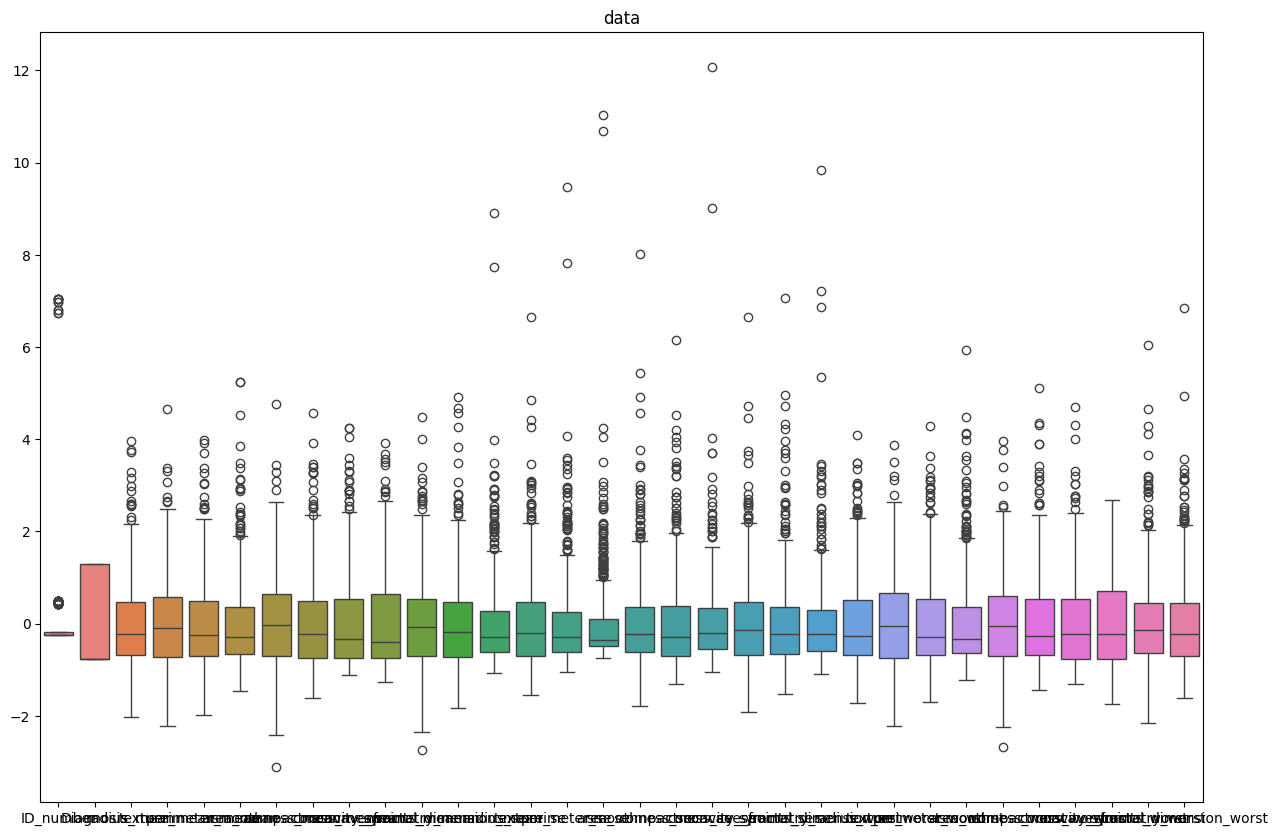

In [6]:
plt.figure(figsize=(15,10))
sns.boxplot(df.select_dtypes(include=np.number))
plt.title('data')
plt.show()


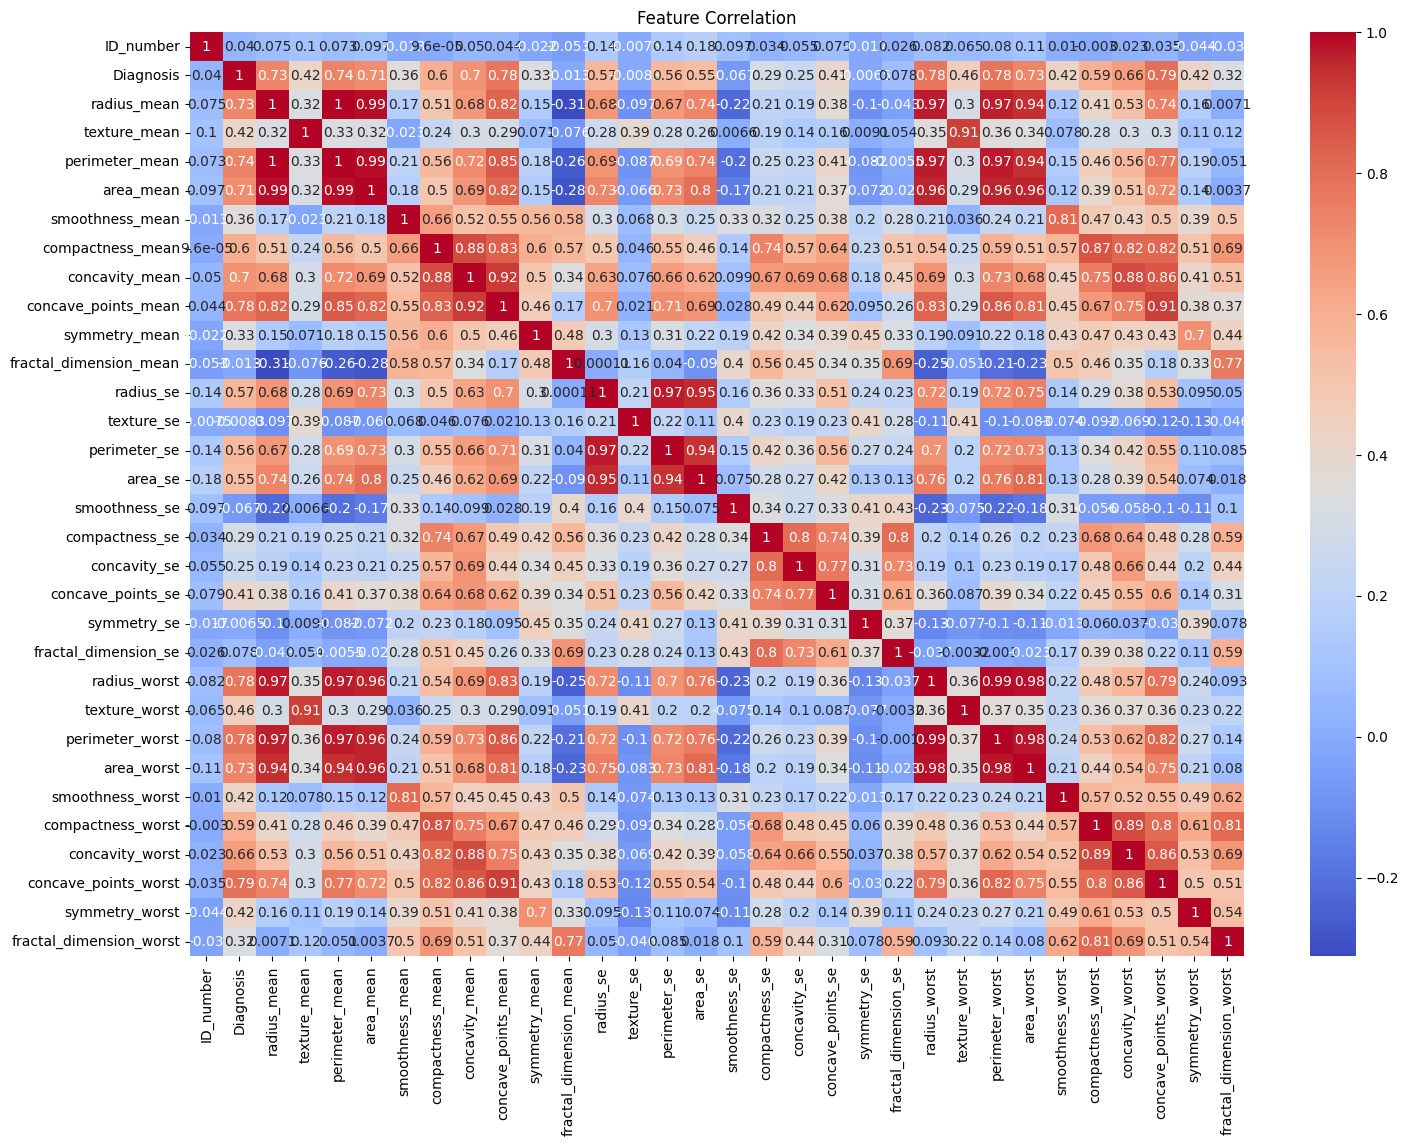

In [7]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

In [8]:
df=pd.read_csv('wdbc_data.csv')
x=df.drop('Diagnosis',axis=1)
y=df['Diagnosis']
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)
accuracies=[]
for k in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    acc=accuracy_score(y_test,knn.predict(X_test))
    accuracies.append(acc)
print(accuracies)
best_k=np.argmax(accuracies)+1
knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

[0.8538011695906432, 0.8362573099415205, 0.8245614035087719, 0.8187134502923976, 0.8187134502923976, 0.8070175438596491, 0.7894736842105263, 0.7953216374269005, 0.8070175438596491, 0.783625730994152]


In [9]:
svm_model=SVC(kernel='poly')
svm_model.fit(X_train,y_train)
y_pred_svm=svm_model.predict(X_test)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score, matthews_corrcoef


def performance_metrics(y_true, y_pred, model_name):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    accuracy = (tp + tn) / (tp + tn + fp + fn) * 100
    sensitivity = tp / (tp + fn) * 100  
    specificity = tn / (tn + fp) * 100  
    g_mean = np.sqrt(sensitivity * specificity)
    fdr = fp / (fp + tp) * 100          
    forate = fn / (fn + tn) * 100       
    mcc = matthews_corrcoef(y_true, y_pred)

    print(f"\n---- {model_name} ----")
    print(f"Accuracy (%) = {accuracy:.2f}")
    print(f"Sensitivity (%) = {sensitivity:.2f}")
    print(f"Specificity (%) = {specificity:.2f}")
    print(f"Geometric Mean (%) = {g_mean:.2f}")
    print(f"False Discovery Rate (%) = {fdr:.2f}")
    print(f"False Omission Rate (%) = {forate:.2f}")
    print(f"Matthews Correlation Coefficient = {mcc:.2f}")

performance_metrics(y_test, y_pred_svm, "SVM (Testing Phase)")
performance_metrics(y_test, y_pred_knn, "KNN (Testing Phase)")



---- SVM (Testing Phase) ----
Accuracy (%) = 66.67
Sensitivity (%) = 1.79
Specificity (%) = 98.26
Geometric Mean (%) = 13.25
False Discovery Rate (%) = 66.67
False Omission Rate (%) = 32.74
Matthews Correlation Coefficient = 0.00

---- KNN (Testing Phase) ----
Accuracy (%) = 85.38
Sensitivity (%) = 67.86
Specificity (%) = 93.91
Geometric Mean (%) = 79.83
False Discovery Rate (%) = 15.56
False Omission Rate (%) = 14.29
Matthews Correlation Coefficient = 0.66


In [ ]:
#Question 3:
svm_model=SVC(kernel='poly')
svm_model.fit(X_train,y_train)
y_pred_1=svm_model.predict(X_test)
svm_model=SVC(kernel='linear')
svm_model.fit(X_train,y_train)
y_pred_2=svm_model.predict(X_test)
svm_model=SVC(kernel='rbf')
svm_model.fit(X_train,y_train)
y_pred_3=svm_model.predict(X_test)
svm_model=SVC(kernel='sigmoid')
svm_model.fit(X_train,y_train)
y_pred_4=svm_model.predict(X_test)

from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 'scale', 'auto'],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Accuracy:", grid.best_score_)
